# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica

## De lo discreto a lo continuo

Generación de una caja en dos dimensiones llena con partículas en posiciones al azar:

In [ ]:
N=10000
L=1
V=L**3
rho_teo=N/V
print(f"Densidad teórica: {rho_teo}")
import numpy as np
rs=np.random.uniform(0,L,size=(N,3))

Densidad teórica: 10000.0


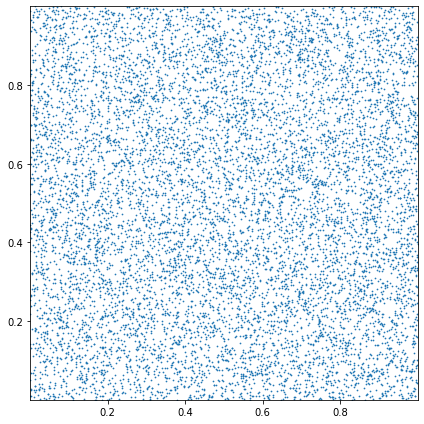

In [ ]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,6))
ax.scatter(rs[:,0],rs[:,1],s=0.5)
ax.margins(0,0)
fig.tight_layout()

Calculemos la densidad cerca al centro de la caja:

In [ ]:
#Tamaño de la caja para determinar la densidad
dL=0.2
dV=dL**3
P=[0.5,0.5,0.5]

n=((abs(rs[:,0]-P[0])<=dL/2)&(abs(rs[:,1]-P[1])<=dL/2)&(abs(rs[:,2]-P[2])<=dL/2)).sum()
rho_obs=n/dV
print(f"Densidad observada: {rho_obs}")

Densidad observada: 9624.999999999998


El número de partículas en el volumen de control es:

In [ ]:
n

1223

El valor de la densidad fluctúa:

In [ ]:
N=10000
L=1
V=L**3
rho_teo=N/V
print(f"Densidad teórica: {rho_teo}")

#Posiciones al azar
rs=np.random.uniform(0,L,size=(N,3))

#Tamaño de la caja para determinar la densidad
dL=0.5
dV=dL**3
P=[0.5,0.5,0.5]

n=((abs(rs[:,0]-P[0])<=dL/2)&(abs(rs[:,1]-P[1])<=dL/2)&(abs(rs[:,2]-P[2])<=dL/2)).sum()
rho_obs=n/dV
print(f"Densidad observada: {rho_obs}")
print(f"Error relativo: {abs(rho_obs-rho_teo)/rho_teo}")

Densidad teórica: 10000.0
Densidad observada: 10032.0
Error relativo: 0.0032


Probemos a hacerlo muchas veces:

Densidad teórica: 10000.0


100%|██████████| 100/100 [00:00<00:00, 2308.20it/s]


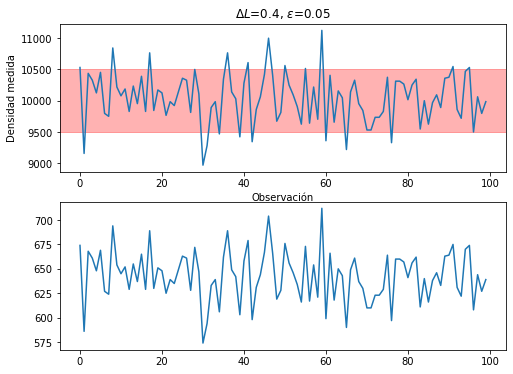

In [ ]:
from tqdm import tqdm
N=10000
L=1
V=L**3
rho_teo=N/V
print(f"Densidad teórica: {rho_teo}")
dL=0.4
dV=dL**3
P=[0.5,0.5,0.5]

rho_obs=[]
ns=[]
for i in tqdm(range(100)):
  #Posiciones al azar
  rs=np.random.uniform(0,L,size=(N,3))
  n=((abs(rs[:,0]-P[0])<=dL/2)&(abs(rs[:,1]-P[1])<=dL/2)&(abs(rs[:,2]-P[2])<=dL/2)).sum()
  ns+=[n]
  rho_obs+=[n/dV]

fig,axs=plt.subplots(2,1,figsize=(8,6))
eps=0.05

ax=axs[0]
ax.axhspan(rho_teo*(1-eps),rho_teo*(1+eps),color='r',alpha=0.3)
ax.set_title(rf"$\Delta L$={dL}, $\epsilon$={eps}")
ax.plot(rho_obs)
ax.set_xlabel("Observación")
ax.set_ylabel("Densidad medida")

ax=axs[1]
ax.plot(ns)